In [45]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## Generate sample dataset

In [25]:
np.random.seed(123)

def generate_coloring(N):
    """Generate a random 2-coloring for integers from 1 to N."""
    colors = ['blue', 'red']
    return [random.choice(colors) for _ in range(N)]

def generate_sample_dataset(num_samples, N, batch_size=1000):
    """Generate a sample dataset of colorings."""
    dataset = []
    batches = num_samples // batch_size
    remainder = num_samples % batch_size
    for _ in range(batches):
        batch = [generate_coloring(N) for _ in range(batch_size)]
        dataset.extend(batch)
    if remainder:
        dataset.extend([generate_coloring(N) for _ in range(remainder)])
    return dataset


num_samples = 100000
N = 100 # Maximum integer value to be colored
sample_dataset = generate_sample_dataset(num_samples, N)

# first 5 colorings in the dataset
for i in range(10):
    print(f"Sample {i + 1}: {sample_dataset[i]}")

Sample 1: ['red', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'red', 'red', 'red', 'red', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'red', 'red', 'red', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'red', 'blue', 'red', 'red', 'blue', 'blue', 'blue']
Sample 2: ['red', 'blue', 'red', 'red', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'red', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'red', 'blue', 'red', 'r

## Anti-symmetry

In [26]:
def anti_symmetry(colors):
    """Calculate the fraction of opposite elements with different colors."""
    n = len(colors)
    num_opposite_different_colors = 0
    total_opposite_pairs = n // 2  # Total number of opposite pairs
    
    for i in range(total_opposite_pairs):
        if colors[i] != colors[n - 1 - i]:  # Check if opposite elements have different colors
            num_opposite_different_colors += 1
    
    # Calculate the fraction
    if total_opposite_pairs != 0:
        fraction_anti_symmetry = num_opposite_different_colors / total_opposite_pairs
    else:
        fraction_anti_symmetry = 0
    
    return fraction_anti_symmetry


# Applying the function on the sample dataset
sample_anti_symmetry = [anti_symmetry(colors) for colors in sample_dataset]

# Print first 5 calculated fractions
for i in range(min(5, len(sample_anti_symmetry))):
    print(f"Sample {i + 1}: {sample_anti_symmetry[i]:.4f}")


Sample 1: 0.5600
Sample 2: 0.3800
Sample 3: 0.5800
Sample 4: 0.5400
Sample 5: 0.5000


## Proportion of more popular color

In [27]:

def calculate_proportion_more_popular_color(colors):
    """Calculate the proportion of the more popular color."""
    # Count occurrences of each color
    counts = {color: colors.count(color) for color in set(colors)}
    
    # Determine the more popular color
    more_popular_color = max(counts, key=counts.get)
    
    # Calculate proportion of the more popular color
    proportion_more_popular_color = counts[more_popular_color] / len(colors)
    
    return proportion_more_popular_color, more_popular_color

# Applying the function on the sample dataset
sample_proportions = [calculate_proportion_more_popular_color(colors) for colors in sample_dataset]

# first 5 calculated proportions and corresponding colors
for i in range(5):
    proportion, color = sample_proportions[i]
    print(f"Sample {i + 1}: Proportion of the more popular color: {proportion}, The more popular color is: {color}")

Sample 1: Proportion of the more popular color: 0.52, The more popular color is: blue
Sample 2: Proportion of the more popular color: 0.55, The more popular color is: blue
Sample 3: Proportion of the more popular color: 0.51, The more popular color is: blue
Sample 4: Proportion of the more popular color: 0.53, The more popular color is: red
Sample 5: Proportion of the more popular color: 0.53, The more popular color is: blue


In [28]:
# Extracting only the proportions from the sample_proportions
sample_popular_proportions_only = [proportions for proportions, _ in sample_proportions]

# first 5 calculated proportions
for i in range(5):
    print(f"Sample {i + 1}: Proportion of the more popular color: {sample_popular_proportions_only[i]}")

Sample 1: Proportion of the more popular color: 0.52
Sample 2: Proportion of the more popular color: 0.55
Sample 3: Proportion of the more popular color: 0.51
Sample 4: Proportion of the more popular color: 0.53
Sample 5: Proportion of the more popular color: 0.53


## Color transition frequency

In [29]:
def calculate_color_transition_frequency(colors):
    """Calculate the frequency of transitions between different colors."""
    transitions = 0
    for i in range(1, len(colors)):
        if colors[i] != colors[i - 1]:
            transitions += 1
    return transitions/N

In [30]:
calculate_color_transition_frequency(['red','blue','red','red','red','blue','blue','blue','blue','red','blue'])

0.05

In [31]:
# Applying the function on the sample dataset
color_transition = [calculate_color_transition_frequency(colors) for colors in sample_dataset]

# first 5 calculated transition frequencies
for i in range(5):
    print(f"Sample {i + 1}: Transition frequency: {color_transition[i]}")


Sample 1: Transition frequency: 0.63
Sample 2: Transition frequency: 0.57
Sample 3: Transition frequency: 0.49
Sample 4: Transition frequency: 0.5
Sample 5: Transition frequency: 0.6


In [32]:
np.mean(color_transition)

0.4948537

## Blockiness 

In [33]:
def blockiness(colors):
    """Calculate the blockiness of the coloring."""
    block_count = 0  # Initialize block count
    max_block_length = 0  # Initialize maximum block length
    current_block_length = 0  # Initialize current block length
    prev_color = None  # Initialize previous color tracker

    for color in colors:
        if color == prev_color:
            current_block_length += 1  # Increment current block length if the same color continues
        else:
            if current_block_length > max_block_length:
                max_block_length = current_block_length  # Update maximum block length if current block is longer
            current_block_length = 1  # Reset current block length for a new color block
            block_count += 1  # Increment block count
            prev_color = color  # Update previous color to current color

    # Check the last block
    if current_block_length > max_block_length:
        max_block_length = current_block_length  # Update maximum block length if the last block is the longest

    # Calculate blockiness as the ratio of the longest block length to the total number of colors
    return max_block_length / len(colors)

# Calculate blockiness for each coloring sequence in the sample dataset
blockiness_values = [blockiness(colors) for colors in sample_dataset]

# Print the first 5 blockiness values
for i in range(5):
    print(f"Sample {i + 1}: Blockiness: {blockiness_values[i]}")


Sample 1: Blockiness: 0.04
Sample 2: Blockiness: 0.06
Sample 3: Blockiness: 0.07
Sample 4: Blockiness: 0.05
Sample 5: Blockiness: 0.05


## Proportions of blue and red

In [34]:
def proportion_of_color(colors, color):
    """Calculate the proportion of a specific color in the coloring."""
    count = colors.count(color)
    total = len(colors)
    return count / total if total > 0 else 0

def proportion_of_blue(colors):
    return proportion_of_color(colors, 'blue')

def proportion_of_red(colors):
    return proportion_of_color(colors, 'red')

In [35]:
# Applying the functions to the sample dataset
proportion_blue = [proportion_of_blue(colors) for colors in sample_dataset]
proportion_red = [proportion_of_red(colors) for colors in sample_dataset]

# Print first 5 calculated proportions for each color
print("Proportion of Blue:")
for i in range(5):
    print(f"Sample {i + 1}: {proportion_blue[i]}")

print("\nProportion of Red:")
for i in range(5):
    print(f"Sample {i + 1}: {proportion_red[i]}")

Proportion of Blue:
Sample 1: 0.52
Sample 2: 0.55
Sample 3: 0.51
Sample 4: 0.47
Sample 5: 0.53

Proportion of Red:
Sample 1: 0.48
Sample 2: 0.45
Sample 3: 0.49
Sample 4: 0.53
Sample 5: 0.47


## Test proportions of monochratic triple fractions (3,3)

In [36]:
def monochromatic_triplets_fraction(colors):
    """Calculate the fraction of monochromatic arithmetic progressions of length 3."""
    n = len(colors)
    monochromatic_ap = 0
    total_ap = 0
    
    # Iterate over all possible triplets (i, j, k) that form an arithmetic progression
    for i in range(n):
        for j in range(i + 1, n):
            diff = j - i
            k = j + diff
            if k < n:
                #print(f"Indices: ({i}, {j}, {k}) -> Colors: ({colors[i]}, {colors[j]}, {colors[k]})")
                total_ap += 1
                if colors[i] == colors[j] == colors[k]:
                    monochromatic_ap += 1
    
    # Calculate the fraction
    if total_ap != 0:
        fraction_monochromatic_ap = monochromatic_ap / total_ap
    else:
        fraction_monochromatic_ap = 0
    
    return fraction_monochromatic_ap

# Applying the function on the sample dataset
sample_monochromatic_triples_fractions = [monochromatic_triplets_fraction(colors) for colors in sample_dataset]

# Print calculated fractions
for i in range(5):
    print(f"Sample {i + 1}: Fraction of monochromatic triplets: {sample_monochromatic_triples_fractions[i]}")


Sample 1: Fraction of monochromatic triplets: 0.23877551020408164
Sample 2: Fraction of monochromatic triplets: 0.2493877551020408
Sample 3: Fraction of monochromatic triplets: 0.2363265306122449
Sample 4: Fraction of monochromatic triplets: 0.2420408163265306
Sample 5: Fraction of monochromatic triplets: 0.25551020408163266


## Fractions of Monochromatic quadruples (4,4)

In [37]:
def monochromatic_quadruples_fraction(colors):
    """Calculate the fraction of monochromatic arithmetic progressions of length 4."""
    n = len(colors)
    monochromatic_ap = 0
    total_ap = 0
    
    # Iterate over all possible quadruples (i, j, k, l) that form an arithmetic progression
    for i in range(n):
        for j in range(i + 1, n):
            diff = j - i
            k = j + diff
            l = k + diff
            if l < n:
               # print(f"Indices: ({i}, {j}, {k}, {l}) -> Colors: ({colors[i]}, {colors[j]}, {colors[k]}, {colors[l]})")
                total_ap += 1
                if colors[i] == colors[j] == colors[k] == colors[l]:
                    monochromatic_ap += 1
    
    # Calculate the fraction
    if total_ap != 0:
        fraction_monochromatic_ap = monochromatic_ap / total_ap
    else:
        fraction_monochromatic_ap = 0
    
    return fraction_monochromatic_ap

# Applying the function on the sample dataset
sample_monochromatic_quadruples_fractions = [monochromatic_quadruples_fraction(colors) for colors in sample_dataset]

# Print calculated fractions
for i in range(5):
    print(f"Sample {i + 1}: Fraction of monochromatic quadruples: {sample_monochromatic_quadruples_fractions[i]}")


Sample 1: Fraction of monochromatic quadruples: 0.10946196660482375
Sample 2: Fraction of monochromatic quadruples: 0.12677798392084105
Sample 3: Fraction of monochromatic quadruples: 0.11688311688311688
Sample 4: Fraction of monochromatic quadruples: 0.11688311688311688
Sample 5: Fraction of monochromatic quadruples: 0.12677798392084105


## Fractions of Monochromatic arithmetic quintuples (5,5)

In [38]:
def monochromatic_quintuples_fraction(colors):
    """Calculate the fraction of monochromatic arithmetic progressions of length 5."""
    n = len(colors)
    monochromatic_ap = 0
    total_ap = 0
    
    # Iterate over all possible quintuples (i, j, k, l, m) that form an arithmetic progression
    for i in range(n):
        for j in range(i + 1, n):
            diff = j - i
            k = j + diff
            l = k + diff
            m = l + diff
            if m < n:
                #print(f"Indices: ({i}, {j}, {k}, {l}, {m}) -> Colors: ({colors[i]}, {colors[j]}, {colors[k]}, {colors[l]}, {colors[m]})")
                total_ap += 1
                if colors[i] == colors[j] == colors[k] == colors[l] == colors[m]:
                    monochromatic_ap += 1
    
    # Calculate the fraction
    if total_ap != 0:
        fraction_monochromatic_ap = monochromatic_ap / total_ap
    else:
        fraction_monochromatic_ap = 0
    
    return fraction_monochromatic_ap

# Sample dataset
# sample_dataset = [
#     ['red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue'],
#     ['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red','blue'],
#     ['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'],
#     ['red', 'red', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'red', 'red'],
#     ['red', 'blue', 'blue', 'red', 'blue', 'red', 'red', 'blue', 'blue', 'red']
# ]

# Applying the function on the sample dataset
sample_monochromatic_quintuples_fractions = [monochromatic_quintuples_fraction(colors) for colors in sample_dataset]

# Print calculated fractions
for i in range(5):
    print(f"Sample {i + 1}: Fraction of monochromatic quintuples: {sample_monochromatic_quintuples_fractions[i]}")


Sample 1: Fraction of monochromatic quintuples: 0.04833333333333333
Sample 2: Fraction of monochromatic quintuples: 0.065
Sample 3: Fraction of monochromatic quintuples: 0.05583333333333333
Sample 4: Fraction of monochromatic quintuples: 0.04833333333333333
Sample 5: Fraction of monochromatic quintuples: 0.07166666666666667


## Monochromatic septuples (7,7)

In [39]:
def monochromatic_septuples_fraction(colors):
    """Calculate the fraction of monochromatic arithmetic progressions of length 7."""
    n = len(colors)
    monochromatic_ap = 0
    total_ap = 0
    
    # Iterate over all possible septuples (i, j, k, l, m, o, p) that form an arithmetic progression
    for i in range(n):
        for j in range(i + 1, n):
            diff = j - i
            k = j + diff
            l = k + diff
            m = l + diff
            o = m + diff
            p = o + diff
            if p < n:
                total_ap += 1
                if colors[i] == colors[j] == colors[k] == colors[l] == colors[m] == colors[o] == colors[p]:
                    monochromatic_ap += 1
    
    # Calculate the fraction
    if total_ap != 0:
        fraction_monochromatic_ap = monochromatic_ap / total_ap
    else:
        fraction_monochromatic_ap = 0
    
    return fraction_monochromatic_ap

# # Sample dataset
# sample_dataset = [
#     ['red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue'],
#     ['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue','blue','blue'],
#     ['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'],
#     ['red', 'red', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'red', 'red'],
#     ['red', 'blue', 'blue', 'red', 'blue', 'red', 'red', 'blue', 'blue', 'red','red']
# ]

# Applying the function on the sample dataset
sample_monochromatic_septuples_fractions = [monochromatic_septuples_fraction(colors) for colors in sample_dataset]

# Print calculated fractions
for i in range(5):
    print(f"Sample {i + 1}: Fraction of monochromatic septuples: {sample_monochromatic_septuples_fractions[i]}")


Sample 1: Fraction of monochromatic septuples: 0.01020408163265306
Sample 2: Fraction of monochromatic septuples: 0.01403061224489796
Sample 3: Fraction of monochromatic septuples: 0.007653061224489796
Sample 4: Fraction of monochromatic septuples: 0.008928571428571428
Sample 5: Fraction of monochromatic septuples: 0.02806122448979592



## Dataframe

In [40]:
monochromatic_triples_df = pd.DataFrame({
'proportion_blue':proportion_blue,
'proportion_red':proportion_red,
'blockiness_values':blockiness_values,
'transition_frequency':color_transition,
'popular_color_prop':sample_popular_proportions_only,
'anti_symmetry':sample_anti_symmetry,
'sample_monochromatic_triples_fractions': sample_monochromatic_triples_fractions,
'sample_monochromatic_quadruples_fractions':sample_monochromatic_quadruples_fractions,
'sample_monochromatic_quintuples_fractions':sample_monochromatic_quintuples_fractions,
'sample_monochromatic_septuples_fractions':sample_monochromatic_septuples_fractions
    })

In [41]:
monochromatic_triples_df.head()

,proportion_blue,proportion_red,blockiness_values,transition_frequency,popular_color_prop,anti_symmetry,sample_monochromatic_triples_fractions,sample_monochromatic_quadruples_fractions,sample_monochromatic_quintuples_fractions,sample_monochromatic_septuples_fractions
0,0.52,0.48,0.04,0.63,0.52,0.56,0.238776,0.109462,0.048333,0.010204
1,0.55,0.45,0.06,0.57,0.55,0.38,0.249388,0.126778,0.065000,0.014031
2,0.51,0.49,0.07,0.49,0.51,0.58,0.236327,0.116883,0.055833,0.007653
3,0.47,0.53,0.05,0.50,0.53,0.54,0.242041,0.116883,0.048333,0.008929
4,0.53,0.47,0.05,0.60,0.53,0.50,0.255510,0.126778,0.071667,0.028061


## Linear Regression testing

In [ ]:
data = monochromatic_triples_df

# Define feature columns and targets
features = [
    'proportion_blue', 
    'proportion_red', 
    'blockiness_values', 
    'transition_frequency', 
    'popular_color_prop', 
    'anti_symmetry'
]

targets = {
    'k3': ('sample_monochromatic_triples_fractions', 3), 
    'k4': ('sample_monochromatic_quadruples_fractions', 4), 
    'k5': ('sample_monochromatic_quintuples_fractions', 5), 
    'k7': ('sample_monochromatic_septuples_fractions', 7)
}

# Store results for each length
train_results = {}

# Loop through each target length
for k, (target, length) in targets.items():
    y = data[target]
    X = data[features]

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Baseline predictions: All predictions are 1/2^(length-1), repeated 20,000 times
    baseline_value = 1 / (2 ** (length - 1))
    y_baseline = [baseline_value] * len(y_test)  # Explicitly match the length of y_test

    # Baseline evaluation
    baseline_mse = mean_squared_error(y_test, y_baseline)
    baseline_rmse = np.sqrt(baseline_mse)

    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    r2 = r2_score(y_test, y_pred)

    # Store the model and evaluation metrics
    train_results[k] = {
        'Model': model,
        'Baseline_MSE': baseline_mse,
        'Baseline_RMSE': baseline_rmse,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

    # Output results
    print(f"Results for k={k}:")
    print(f"Baseline Mean Squared Error: {baseline_mse:.4f}")
    print(f"Baseline Root Mean Squared Error: {baseline_rmse:.4f}")
    print(f"Linear Regression Mean Squared Error: {mse:.4f}")
    print(f"Linear Regression Root Mean Squared Error: {rmse:.4f}")
    print(f"Linear Regression R^2 Score: {r2:.4f}")
    print()


Results for k=k3:
Baseline Mean Squared Error: 0.0002
Baseline Root Mean Squared Error: 0.0126
Linear Regression Mean Squared Error: 0.0001
Linear Regression Root Mean Squared Error: 0.0078
Linear Regression R^2 Score: 0.6185

Results for k=k4:
Baseline Mean Squared Error: 0.0002
Baseline Root Mean Squared Error: 0.0142
Linear Regression Mean Squared Error: 0.0001
Linear Regression Root Mean Squared Error: 0.0099
Linear Regression R^2 Score: 0.5183

Results for k=k5:
Baseline Mean Squared Error: 0.0002
Baseline Root Mean Squared Error: 0.0134
Linear Regression Mean Squared Error: 0.0001
Linear Regression Root Mean Squared Error: 0.0100
Linear Regression R^2 Score: 0.4383

Results for k=k7:
Baseline Mean Squared Error: 0.0001
Baseline Root Mean Squared Error: 0.0088
Linear Regression Mean Squared Error: 0.0001
Linear Regression Root Mean Squared Error: 0.0071
Linear Regression R^2 Score: 0.3508



## LR With Feature Importance and ScatterPlots


Feature Importances for k=3:
  proportion_blue: 682435401603.231445
  proportion_red: 682435401603.231567
  blockiness_values: 0.000361
  transition_frequency: 0.000000
  popular_color_prop: 0.007770
  anti_symmetry: 0.000043


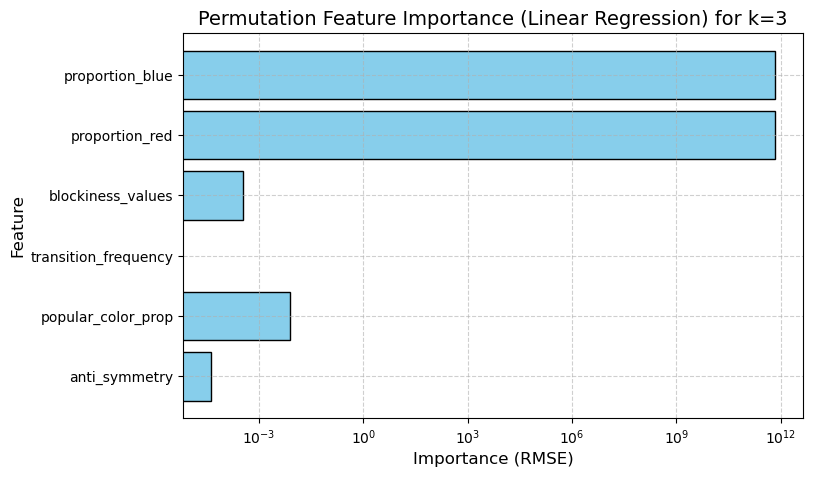

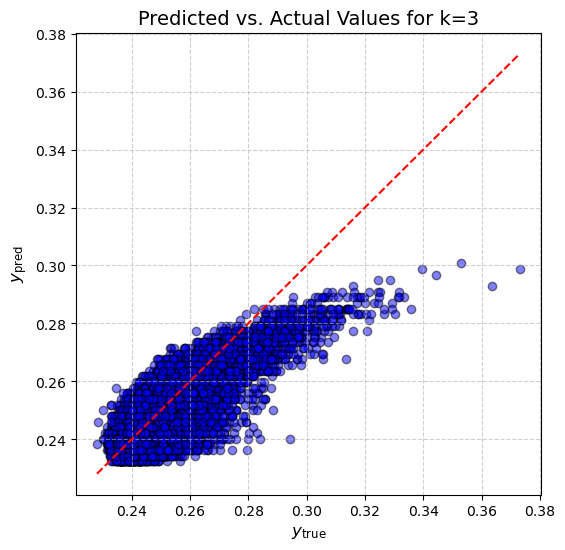

Results for k=3:
Baseline RMSE: 0.0126
Linear Regression RMSE: 0.0078
R² Score: 0.6185

Feature Importances for k=4:
  proportion_blue: 654085723922.540405
  proportion_red: 654085723922.540649
  blockiness_values: 0.001029
  transition_frequency: 0.000021
  popular_color_prop: 0.006670
  anti_symmetry: 0.000013


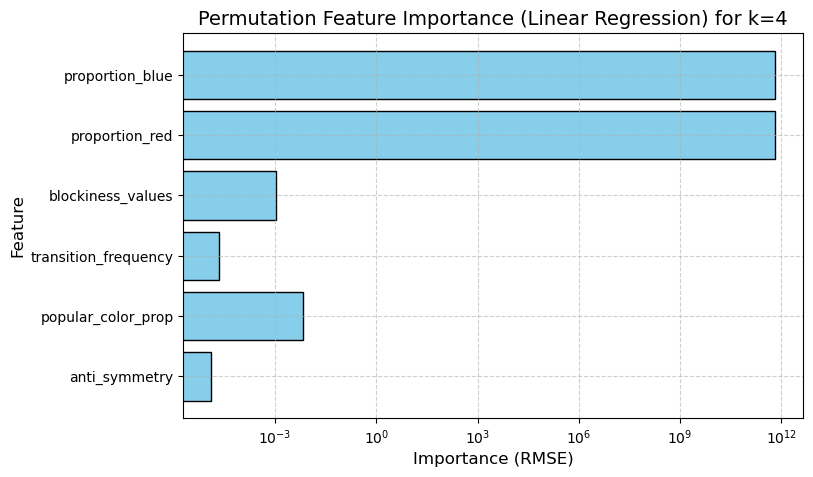

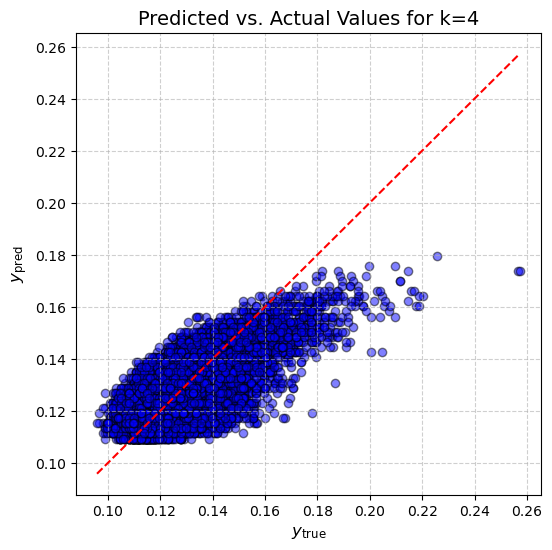

Results for k=4:
Baseline RMSE: 0.0142
Linear Regression RMSE: 0.0099
R² Score: 0.5183

Feature Importances for k=5:
  proportion_blue: 514427636506.051941
  proportion_red: 514427636506.052124
  blockiness_values: 0.001268
  transition_frequency: 0.000045
  popular_color_prop: 0.004646
  anti_symmetry: 0.000015


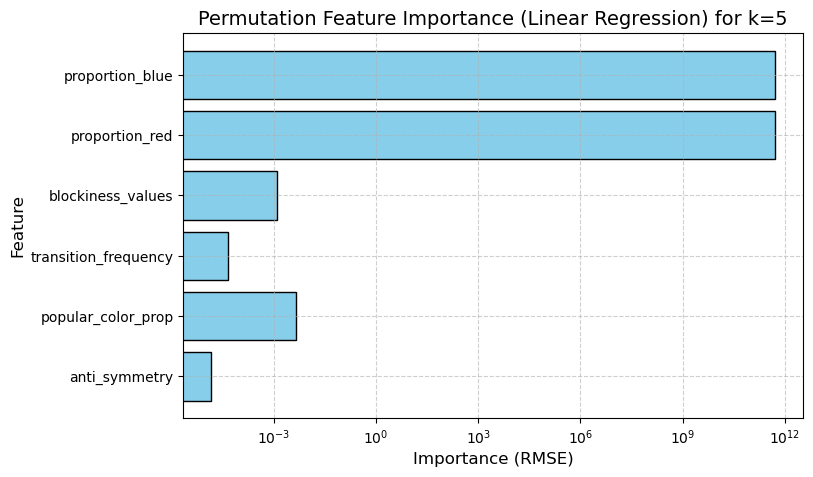

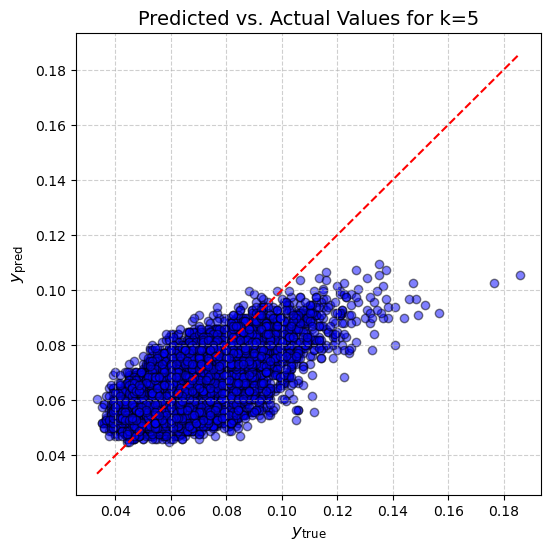

Results for k=5:
Baseline RMSE: 0.0134
Linear Regression RMSE: 0.0100
R² Score: 0.4383

Feature Importances for k=7:
  proportion_blue: 231841151503.805084
  proportion_red: 231841151503.805115
  blockiness_values: 0.001410
  transition_frequency: 0.000097
  popular_color_prop: 0.001714
  anti_symmetry: 0.000005


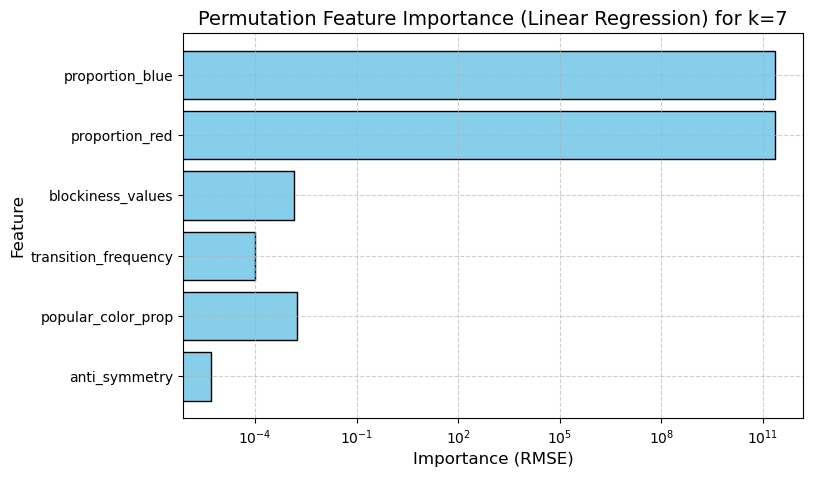

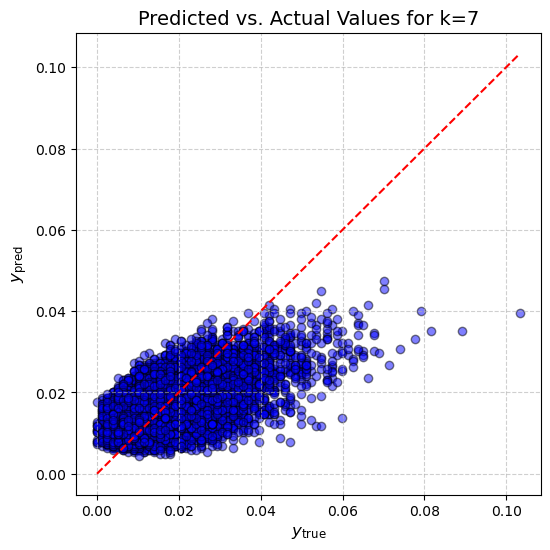

Results for k=7:
Baseline RMSE: 0.0088
Linear Regression RMSE: 0.0071
R² Score: 0.3508


In [56]:
# Store results for each length
train_results = {}

# Loop through each target length
for k, (target, length) in targets.items():
    y = data[target]
    X = data[features]

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Baseline predictions: All predictions are 1/2^(length-1), repeated len(y_test) times
    baseline_value = 1 / (2 ** (length - 1))
    y_baseline = np.full_like(y_test, baseline_value)

    # Baseline evaluation
    baseline_mse = mean_squared_error(y_test, y_baseline)
    baseline_rmse = np.sqrt(baseline_mse)

    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    r2 = r2_score(y_test, y_pred)

    # Compute Permutation Feature Importance using RMSE
    perm_importance = permutation_importance(model, X_test, y_test, scoring='neg_root_mean_squared_error', n_repeats=10, random_state=42)
    
    # Print feature importances
    print(f"\nFeature Importances for k={length}:")
    for feature, importance in zip(features, perm_importance.importances_mean):
        print(f"  {feature}: {importance:.6f}")

    # Store the model and evaluation metrics
    train_results[k] = {
        'Model': model,
        'Baseline_MSE': baseline_mse,
        'Baseline_RMSE': baseline_rmse,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'Feature_Importance': perm_importance.importances_mean
    }

    # Plot Feature Importances
    plt.figure(figsize=(8, 5))
    plt.xscale('log')
    plt.barh(features, perm_importance.importances_mean, color='skyblue', edgecolor='black')
    plt.xlabel("Importance (RMSE)", fontsize=12)
    plt.ylabel("Feature", fontsize=12)
    plt.title(f"Permutation Feature Importance (Linear Regression) for k={length}", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.gca().invert_yaxis()  
    plt.show()

    # Scatter Plot of Predictions vs. True Values
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, color='blue', edgecolors='k')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")  # y=x line
    plt.xlabel(r"$y_{\mathrm{true}}$", fontsize=12)
    plt.ylabel(r"$y_{\mathrm{pred}}$", fontsize=12)
    plt.title(f"Predicted vs. Actual Values for k={length}", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

    # Output results
    print(f"Results for k={length}:")
    print(f"Baseline RMSE: {baseline_rmse:.4f}")
    print(f"Linear Regression RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")


## Random Forest testing

Results for RF k=k3:
Baseline Mean Squared Error: 0.0002
Baseline Root Mean Squared Error: 0.0126
Random Forest Mean Squared Error: 0.0001
Random Forest Root Mean Squared Error: 0.0073
Random Forest R^2 Score: 0.6655



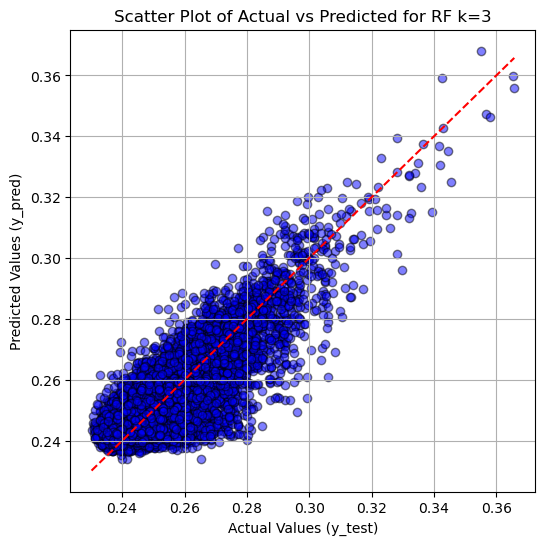

Feature Importances for RF k=k3:
                Feature  Importance
4    popular_color_prop    0.837871
3  transition_frequency    0.066375
5         anti_symmetry    0.041057
2     blockiness_values    0.036662
0       proportion_blue    0.009043
1        proportion_red    0.008992



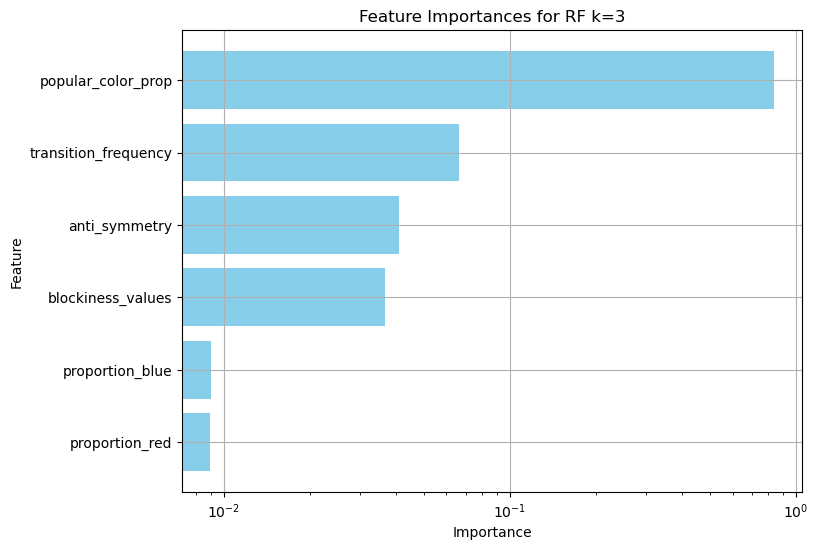

Results for RF k=k4:
Baseline Mean Squared Error: 0.0002
Baseline Root Mean Squared Error: 0.0143
Random Forest Mean Squared Error: 0.0001
Random Forest Root Mean Squared Error: 0.0101
Random Forest R^2 Score: 0.5011



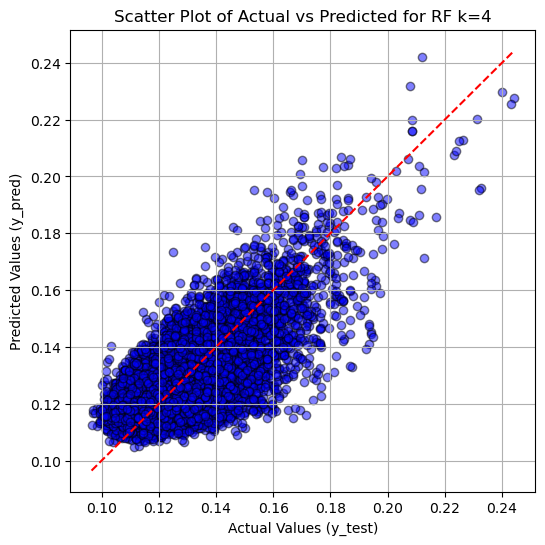

Feature Importances for RF k=k4:
                Feature  Importance
4    popular_color_prop    0.718356
3  transition_frequency    0.105412
5         anti_symmetry    0.074690
2     blockiness_values    0.071805
1        proportion_red    0.014927
0       proportion_blue    0.014810



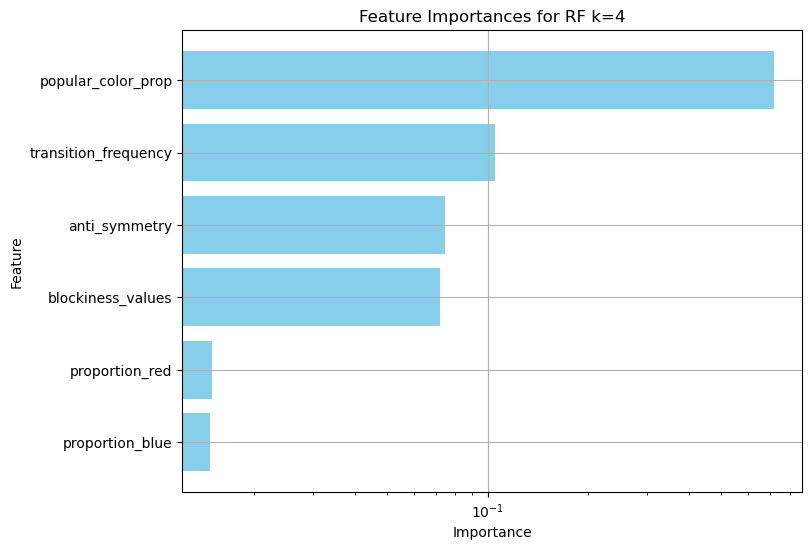

Results for RF k=k5:
Baseline Mean Squared Error: 0.0002
Baseline Root Mean Squared Error: 0.0134
Random Forest Mean Squared Error: 0.0001
Random Forest Root Mean Squared Error: 0.0104
Random Forest R^2 Score: 0.3949



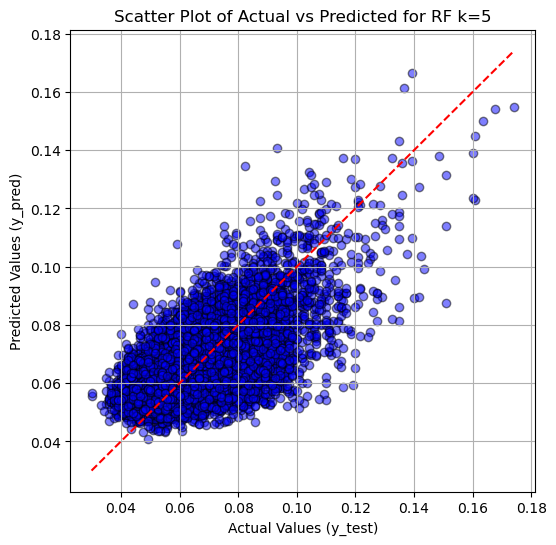

Feature Importances for RF k=k5:
                Feature  Importance
4    popular_color_prop    0.604634
3  transition_frequency    0.138742
2     blockiness_values    0.114405
5         anti_symmetry    0.100385
1        proportion_red    0.020973
0       proportion_blue    0.020861



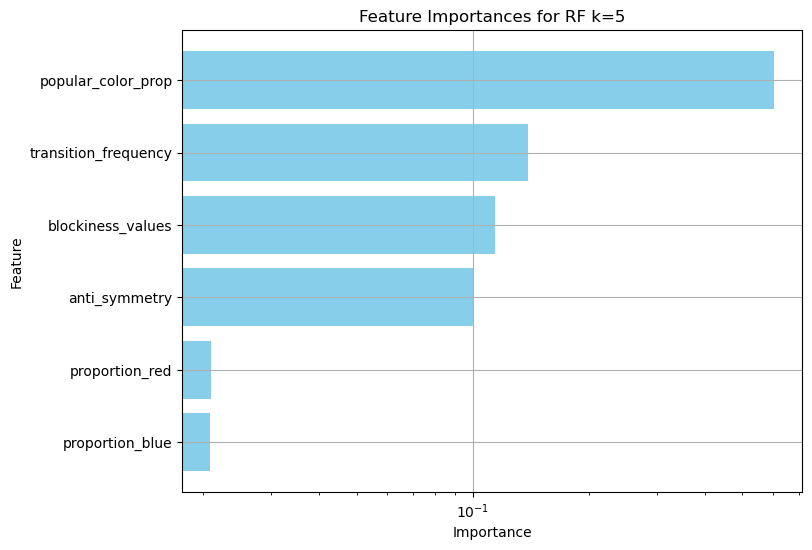

Results for RF k=k7:
Baseline Mean Squared Error: 0.0001
Baseline Root Mean Squared Error: 0.0089
Random Forest Mean Squared Error: 0.0001
Random Forest Root Mean Squared Error: 0.0075
Random Forest R^2 Score: 0.2838



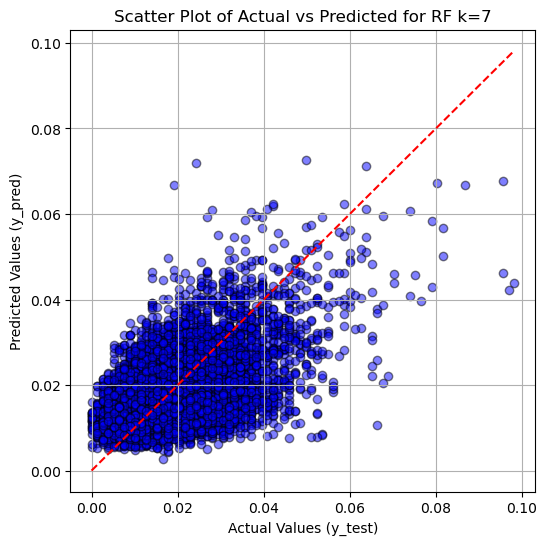

Feature Importances for RF k=k7:
                Feature  Importance
4    popular_color_prop    0.402166
2     blockiness_values    0.225267
3  transition_frequency    0.174061
5         anti_symmetry    0.135414
1        proportion_red    0.031730
0       proportion_blue    0.031362



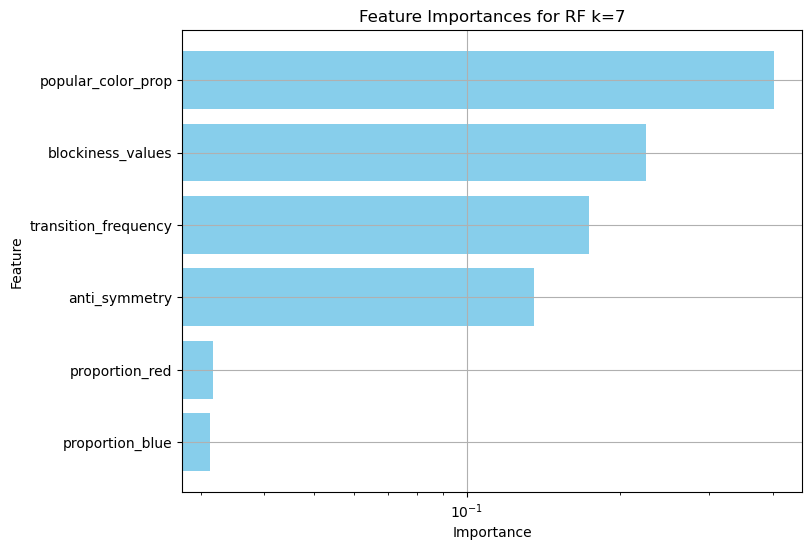

In [22]:

data = monochromatic_triples_df

rf_features = [
    'proportion_blue', 
    'proportion_red', 
    'blockiness_values', 
    'transition_frequency', 
    'popular_color_prop', 
    'anti_symmetry'
]

rf_targets = {
    'k3': ('sample_monochromatic_triples_fractions', 3), 
    'k4': ('sample_monochromatic_quadruples_fractions', 4), 
    'k5': ('sample_monochromatic_quintuples_fractions', 5), 
    'k7': ('sample_monochromatic_septuples_fractions', 7)
}

# Store results for each length
rf_train_results = {}


# Loop through each target length
for rf_k, (rf_target, rf_length) in rf_targets.items():
    rf_y = data[rf_target]
    rf_X = data[rf_features]

    # Split data into training and test sets
    rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(rf_X, rf_y, test_size=0.2, random_state=42)

    # Baseline predictions: All predictions are 1/2^(rf_length-1), repeated for the length of rf_y_test
    rf_baseline_value = 1 / (2 ** (rf_length - 1))
    rf_y_baseline = [rf_baseline_value] * len(rf_y_test)

    # Baseline evaluation
    rf_baseline_mse = mean_squared_error(rf_y_test, rf_y_baseline)
    rf_baseline_rmse = np.sqrt(rf_baseline_mse)

    # Train Random Forest model
    rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
    rf_model.fit(rf_X_train, rf_y_train)

    # Predict and evaluate
    rf_y_pred = rf_model.predict(rf_X_test)
    rf_mse = mean_squared_error(rf_y_test, rf_y_pred)
    rf_rmse = np.sqrt(rf_mse)  # Root Mean Squared Error
    rf_r2 = r2_score(rf_y_test, rf_y_pred)

    # Store the model and evaluation metrics
    rf_train_results[rf_k] = {
        'Model': rf_model,
        'Baseline_MSE': rf_baseline_mse,
        'Baseline_RMSE': rf_baseline_rmse,
        'MSE': rf_mse,
        'RMSE': rf_rmse,
        'R2': rf_r2
    }

    # Output results
    print(f"Results for RF k={rf_k}:")
    print(f"Baseline Mean Squared Error: {rf_baseline_mse:.4f}")
    print(f"Baseline Root Mean Squared Error: {rf_baseline_rmse:.4f}")
    print(f"Random Forest Mean Squared Error: {rf_mse:.4f}")
    print(f"Random Forest Root Mean Squared Error: {rf_rmse:.4f}")
    print(f"Random Forest R^2 Score: {rf_r2:.4f}")
    print()

    # Scatter plot: y_test vs. y_pred
    plt.figure(figsize=(6, 6))
    plt.scatter(rf_y_test, rf_y_pred, alpha=0.5, color='blue', edgecolors='k')
    plt.plot([min(rf_y_test), max(rf_y_test)], [min(rf_y_test), max(rf_y_test)], color='red', linestyle='--')
    plt.title(f"Scatter Plot of Actual vs Predicted for RF k={rf_length}")
    plt.xlabel("Actual Values (y_test)")
    plt.ylabel("Predicted Values (y_pred)")
    plt.grid(True)
    plt.show()

    # Feature importances
    feature_importances = rf_model.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': rf_X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    # Print feature importances
    print(f"Feature Importances for RF k={rf_k}:")
    print(importance_df)
    print()

    # Bar plot of feature importances
    plt.figure(figsize=(8, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.xscale("log")
    plt.gca().invert_yaxis()  
    plt.title(f"Feature Importances for RF k={rf_length}")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.grid(True)
    plt.show()


## MLP Regression

In [95]:
mlp_features = [
    'proportion_blue', 
    'proportion_red', 
    'blockiness_values', 
    'transition_frequency', 
    'popular_color_prop', 
    'anti_symmetry'
]

mlp_targets = {
    'k3': ('sample_monochromatic_triples_fractions', 3),
    'k4': ('sample_monochromatic_quadruples_fractions', 4),
    'k5': ('sample_monochromatic_quintuples_fractions', 5),
    'k7': ('sample_monochromatic_septuples_fractions', 7),
}

mlp_train_results = {}

# Loop through each target length
for mlp_k, (mlp_target, mlp_length) in mlp_targets.items():
    mlp_y = data[mlp_target]
    mlp_X = data[mlp_features]  

    # Split data into training and test sets
    mlp_X_train, mlp_X_test, mlp_y_train, mlp_y_test = train_test_split(
        mlp_X, mlp_y, test_size=0.2, random_state=42
    )

    # Baseline predictions: All predictions are 1/2^(mlp_length-1), repeated for the length of mlp_y_test
    mlp_baseline_value = 1 / (2 ** (mlp_length - 1))
    mlp_y_baseline = [mlp_baseline_value] * len(mlp_y_test)

    # Baseline evaluation
    mlp_baseline_mse = mean_squared_error(mlp_y_test, mlp_y_baseline)
    mlp_baseline_rmse = np.sqrt(mlp_baseline_mse)

    # Train MLP model
    model_nn = MLPRegressor(
        hidden_layer_sizes=(200, 180),
        activation="relu",
        solver="adam",
        alpha=0.0001,
        batch_size="auto",
        learning_rate="constant",
        learning_rate_init=0.001,
        max_iter=200,
        random_state=42,
        tol=1e-4,
        verbose=0,
    )

    model_nn.fit(mlp_X_train, mlp_y_train)

    # Predict and evaluate
    mlp_y_pred = model_nn.predict(mlp_X_test)
    mlp_mse = mean_squared_error(mlp_y_test, mlp_y_pred)
    mlp_rmse = np.sqrt(mlp_mse)
    mlp_r2 = r2_score(mlp_y_test, mlp_y_pred)
    mlp_mae = mean_absolute_error(mlp_y_test, mlp_y_pred)

    # Store the model and evaluation metrics
    mlp_train_results[mlp_k] = {
        "Model": model_nn,
        "Baseline_MSE": mlp_baseline_mse,
        "Baseline_RMSE": mlp_baseline_rmse,
        "MSE": mlp_mse,
        "RMSE": mlp_rmse,
        "R2": mlp_r2,
        "MAE": mlp_mae,
    }

    # Output results
    print(f"Results for MLP k={mlp_k}:")
    print(f"Baseline Mean Squared Error: {mlp_baseline_mse:.4f}")
    print(f"Baseline Root Mean Squared Error: {mlp_baseline_rmse:.4f}")
    print(f"MLP Mean Squared Error: {mlp_mse:.4f}")
    print(f"MLP Root Mean Squared Error: {mlp_rmse:.4f}")
    print(f"MLP Mean Absolute Error: {mlp_mae:.4f}")
    print(f"MLP R^2 Score: {mlp_r2:.4f}")
    print()


Results for MLP k=k3:
Baseline Mean Squared Error: 0.0002
Baseline Root Mean Squared Error: 0.0127
MLP Mean Squared Error: 0.0001
MLP Root Mean Squared Error: 0.0071
MLP Mean Absolute Error: 0.0058
MLP R^2 Score: 0.6835

Results for MLP k=k4:
Baseline Mean Squared Error: 0.0002
Baseline Root Mean Squared Error: 0.0144
MLP Mean Squared Error: 0.0001
MLP Root Mean Squared Error: 0.0093
MLP Mean Absolute Error: 0.0070
MLP R^2 Score: 0.5792

Results for MLP k=k5:
Baseline Mean Squared Error: 0.0002
Baseline Root Mean Squared Error: 0.0135
MLP Mean Squared Error: 0.0001
MLP Root Mean Squared Error: 0.0097
MLP Mean Absolute Error: 0.0076
MLP R^2 Score: 0.4843

Results for MLP k=k7:
Baseline Mean Squared Error: 0.0001
Baseline Root Mean Squared Error: 0.0089
MLP Mean Squared Error: 0.0001
MLP Root Mean Squared Error: 0.0071
MLP Mean Absolute Error: 0.0052
MLP R^2 Score: 0.3720



## MLP With Feature Importance and Ypred vs. Actual


Feature Importances for MLP k=3:
  proportion_blue: 0.003244
  proportion_red: 0.003027
  blockiness_values: 0.000292
  transition_frequency: 0.000006
  popular_color_prop: 0.003664
  anti_symmetry: 0.000035


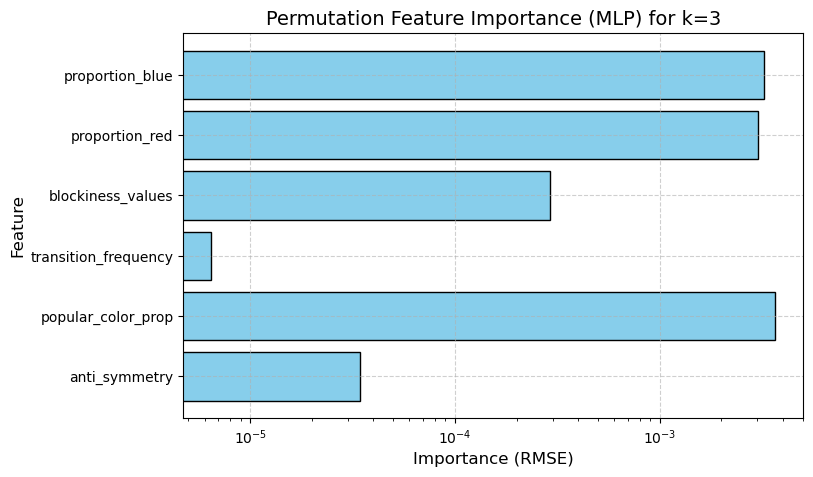

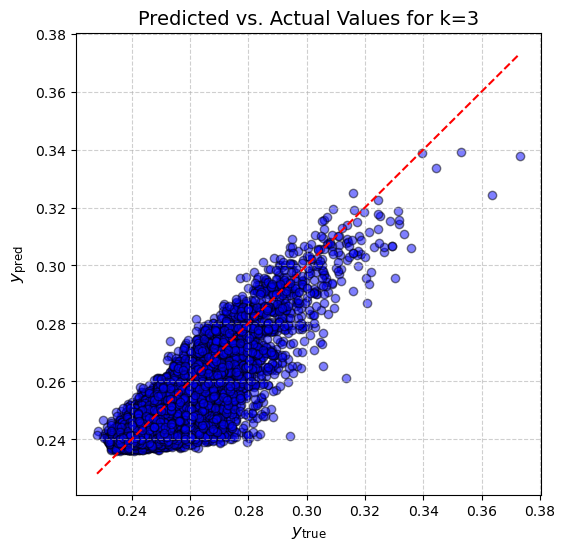

Results for MLP k=3:
Baseline RMSE: 0.0126
MLP RMSE: 0.0071
MLP R² Score: 0.6771

Feature Importances for MLP k=4:
  proportion_blue: 0.001783
  proportion_red: 0.002073
  blockiness_values: 0.000776
  transition_frequency: 0.000027
  popular_color_prop: 0.002083
  anti_symmetry: 0.000019


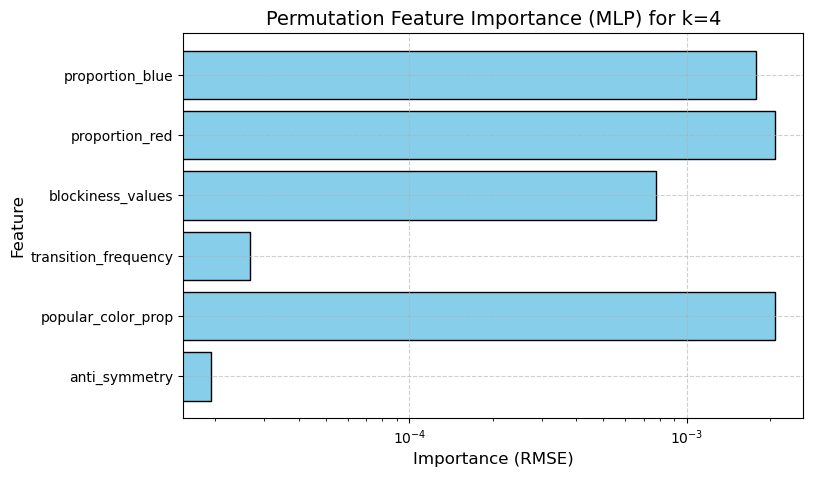

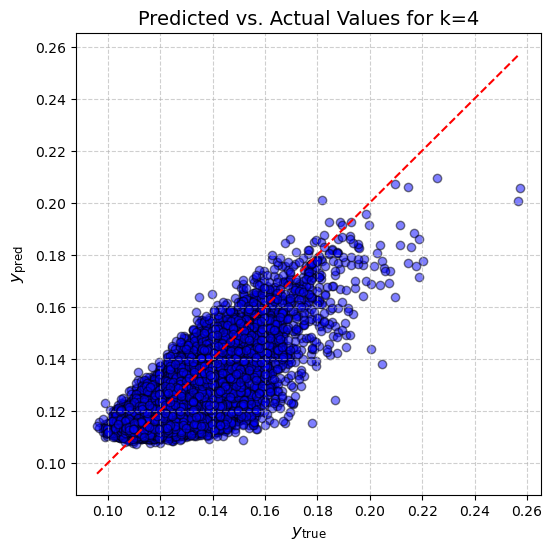

Results for MLP k=4:
Baseline RMSE: 0.0142
MLP RMSE: 0.0098
MLP R² Score: 0.5290

Feature Importances for MLP k=5:
  proportion_blue: 0.001006
  proportion_red: 0.000813
  blockiness_values: 0.001224
  transition_frequency: 0.000060
  popular_color_prop: 0.001706
  anti_symmetry: 0.000027


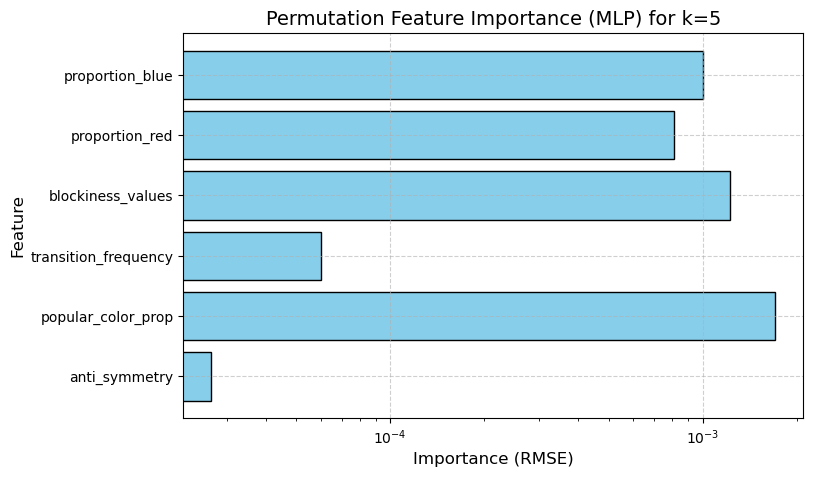

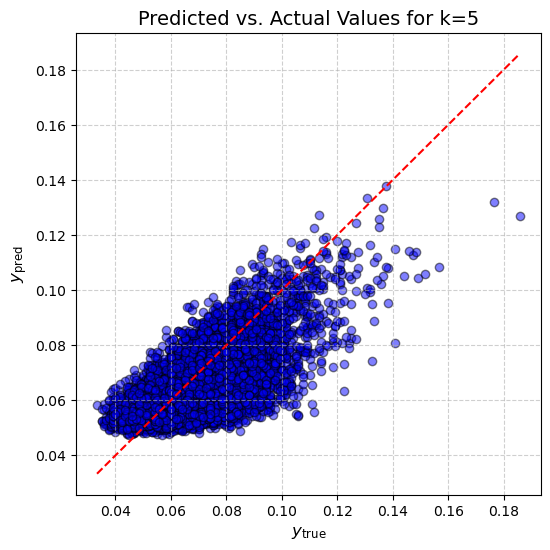

Results for MLP k=5:
Baseline RMSE: 0.0134
MLP RMSE: 0.0098
MLP R² Score: 0.4698

Feature Importances for MLP k=7:
  proportion_blue: -0.000025
  proportion_red: -0.000079
  blockiness_values: 0.001132
  transition_frequency: 0.000023
  popular_color_prop: 0.000310
  anti_symmetry: 0.000018


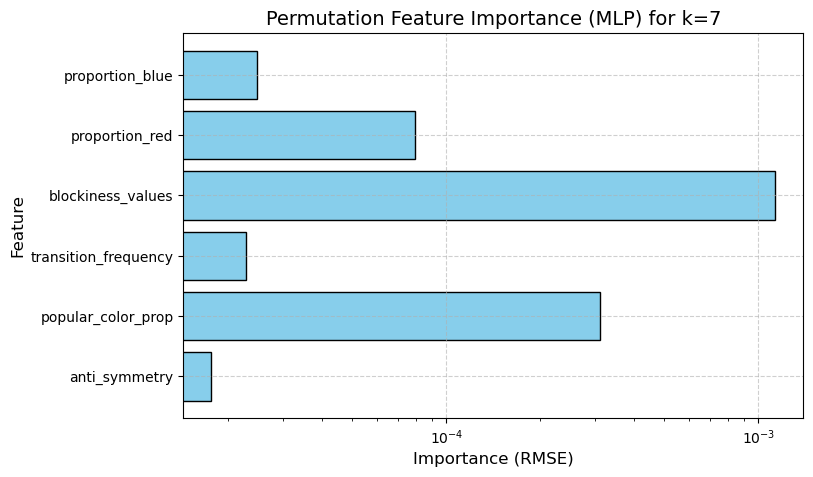

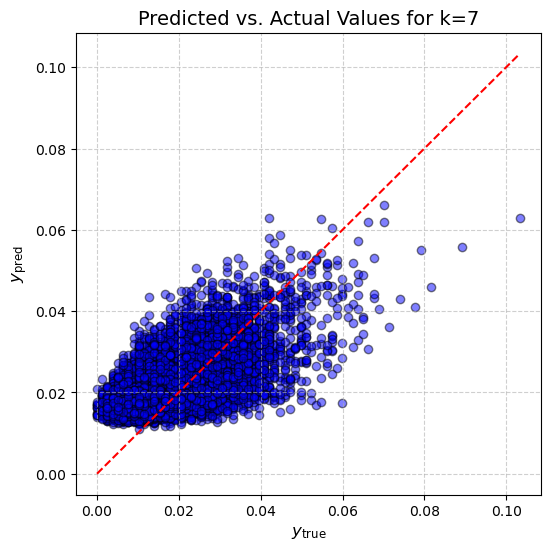

Results for MLP k=7:
Baseline RMSE: 0.0088
MLP RMSE: 0.0084
MLP R² Score: 0.0814


In [ ]:

mlp_train_results = {}

# Loop through each target length
for mlp_k, (mlp_target, mlp_length) in mlp_targets.items():
    mlp_y = data[mlp_target]
    mlp_X = data[mlp_features]  

    # Split data into training and test sets
    mlp_X_train, mlp_X_test, mlp_y_train, mlp_y_test = train_test_split(
        mlp_X, mlp_y, test_size=0.2, random_state=42
    )

    # Baseline predictions: All predictions are 1/2^(mlp_length-1), repeated for the length of mlp_y_test
    mlp_baseline_value = 1 / (2 ** (mlp_length - 1))
    mlp_y_baseline = np.full_like(mlp_y_test, mlp_baseline_value)

    # Baseline evaluation
    mlp_baseline_mse = mean_squared_error(mlp_y_test, mlp_y_baseline)
    mlp_baseline_rmse = np.sqrt(mlp_baseline_mse)

    # Train MLP model
    model_nn = MLPRegressor(
        hidden_layer_sizes=(200, 180),
        activation="relu",
        solver="adam",
        alpha=0.0001,
        batch_size="auto",
        learning_rate="constant",
        learning_rate_init=0.001,
        max_iter=200,
        random_state=42,
        tol=1e-4,
        verbose=0,
    )

    model_nn.fit(mlp_X_train, mlp_y_train)

    # Predict and evaluate
    mlp_y_pred = model_nn.predict(mlp_X_test)
    mlp_mse = mean_squared_error(mlp_y_test, mlp_y_pred)
    mlp_rmse = np.sqrt(mlp_mse)
    mlp_r2 = r2_score(mlp_y_test, mlp_y_pred)
    mlp_mae = mean_absolute_error(mlp_y_test, mlp_y_pred)

    # Compute Permutation Feature Importance using RMSE
    perm_importance = permutation_importance(model_nn, mlp_X_test, mlp_y_test, scoring='neg_root_mean_squared_error', n_repeats=10, random_state=42)
    
    # Print feature importances
    print(f"\nFeature Importances for MLP k={mlp_k}:")
    for feature, importance in zip(mlp_features, perm_importance.importances_mean):
        print(f"  {feature}: {importance:.6f}")

    # Store the model and evaluation metrics
    mlp_train_results[mlp_k] = {
        "Model": model_nn,
        "Baseline_MSE": mlp_baseline_mse,
        "Baseline_RMSE": mlp_baseline_rmse,
        "MSE": mlp_mse,
        "RMSE": mlp_rmse,
        "R2": mlp_r2,
        "MAE": mlp_mae,
        "Feature_Importance": perm_importance.importances_mean
    }

    # Plot Feature Importances (Log Scale)
    plt.figure(figsize=(8, 5))
    plt.barh(mlp_features, np.abs(perm_importance.importances_mean), color='skyblue', edgecolor='black')
    plt.xscale("log")  
    plt.xlabel("Importance (RMSE)", fontsize=12)
    plt.ylabel("Feature", fontsize=12)
    plt.title(f"Permutation Feature Importance (MLP) for k={mlp_k}", fontsize=14)  
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.gca().invert_yaxis()  
    plt.show()

    # Scatter Plot of Predictions vs. True Values
    plt.figure(figsize=(6, 6))
    plt.scatter(mlp_y_test, mlp_y_pred, alpha=0.5, color='blue', edgecolors='k')
    plt.plot([min(mlp_y_test), max(mlp_y_test)], [min(mlp_y_test), max(mlp_y_test)], linestyle="--", color="red")  # y=x line
    plt.xlabel(r"$y_{\mathrm{true}}$", fontsize=12)
    plt.ylabel(r"$y_{\mathrm{pred}}$", fontsize=12)
    plt.title(f"Predicted vs. Actual Values for k={mlp_k}", fontsize=14)  
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

    # Output results
    print(f"Results for MLP k={mlp_k}:")
    print(f"Baseline RMSE: {mlp_baseline_rmse:.4f}")
    print(f"MLP RMSE: {mlp_rmse:.4f}")
    print(f"MLP R² Score: {mlp_r2:.4f}")
